##### Ishaan Sinha
##### Roll number : 21CS30064

# TASK - 1

In [25]:
# Downloading Corpus from NLTK

import nltk
from nltk.corpus import treebank
from nltk.tokenize import sent_tokenize, word_tokenize

# Download the required dataset
nltk.download('treebank')

# Using nltk tools
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\ishaa\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ishaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ishaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ishaa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [26]:
# Loading the Treebank Corpus for training purposes
Sent_tb = treebank.tagged_sents()

In [27]:
sent = 'I am Ishaan Sinha. I am a student of Computer Science Department.'

tokens = sent_tokenize(sent)
print('Sentence Tokens: ',tokens)
print()

tokens = word_tokenize(sent)
print('Word Tokens: ',tokens)
print()

# Not using this function in the assignment, just printing the tags
# tagged = nltk.pos_tag(tokens)
# print('POS Tags: ',tagged)

Sentence Tokens:  ['I am Ishaan Sinha.', 'I am a student of Computer Science Department.']

Word Tokens:  ['I', 'am', 'Ishaan', 'Sinha', '.', 'I', 'am', 'a', 'student', 'of', 'Computer', 'Science', 'Department', '.']



In [28]:
# Extracting all the tags from the Treebank Corpus and storing them in a list
Tags =[tag for sentence in Sent_tb for word, tag in sentence]

# Identifying unique tags
Unique_Tags = set(Tags)

# Printing the unique tags
print('Unique Tags: ',Unique_Tags)
print()

Unique Tags:  {'CD', 'WDT', 'EX', 'NNPS', ':', 'NNP', 'VBZ', 'VBD', 'CC', 'RB', 'RP', 'TO', 'NN', 'SYM', 'VBP', 'PRP$', 'JJR', 'JJS', 'PDT', 'VBN', 'WRB', 'JJ', 'NNS', '-LRB-', '``', 'POS', '#', 'RBS', 'MD', 'WP$', 'PRP', '.', '$', ',', 'VBG', 'IN', 'RBR', 'LS', '-RRB-', 'UH', 'VB', '-NONE-', 'WP', 'FW', "''", 'DT'}



In [29]:
# # Creating Transmission Matrix

# from collections import defaultdict

# transition_matrix = defaultdict(lambda: defaultdict(int))

# # Counting transition frequencies
# for sentence in Sent_tb:
#     for i, (word, tag1) in enumerate(sentence[:-1]):
#         tag2 = sentence[i + 1][1]
#         transition_matrix[tag1][tag2] += 1

# # Normalizing transition probabilities
# for tag1 in transition_matrix:
#     total_transitions = sum(transition_matrix[tag1].values())
#     if total_transitions > 0:
#         for tag2 in transition_matrix[tag1]:
#             transition_matrix[tag1][tag2] /= total_transitions

In [30]:
# from collections import defaultdict

# # Function to count emissions
# def count_emissions(corpus):
#     # Using defaultdict to simplify the dictionary handling
#     emission_counts = defaultdict(lambda: defaultdict(int))
#     for word, tag in corpus:
#         emission_counts[tag][word] += 1
#     return emission_counts

# # Function to normalize emissions
# def normalize_emissions(emission_counts):
#     emission_probabilities = {}
#     for tag, words in emission_counts.items():
#         total_emissions = sum(words.values())
#         emission_probabilities[tag] = {word: count / total_emissions for word, count in words.items()}
#     return emission_probabilities

# # Count emissions using the treebank corpus
# emission_counts = count_emissions(treebank.tagged_words())

# # Normalize the counts to get probabilities
# emission_matrix = normalize_emissions(emission_counts)

In [31]:
# Creating Transmission Matrix

from collections import defaultdict

# Initialize transition matrix with defaultdict
transition_matrix = defaultdict(lambda: defaultdict(int))

# Count transition frequencies
for sentence in Sent_tb:
    for i, (word, tag1) in enumerate(sentence[:-1]):
        tag2 = sentence[i + 1][1]
        transition_matrix[tag1][tag2] += 1

# Get unique tags
Unique_Tags = set(tag for sentence in Sent_tb for _, tag in sentence)

# Apply Laplace smoothing and normalize transition probabilities
for tag1 in transition_matrix:
    total_transitions = sum(transition_matrix[tag1].values()) + len(Unique_Tags)  # Adding the number of tags for smoothing
    for tag2 in Unique_Tags:
        transition_matrix[tag1][tag2] = (transition_matrix[tag1][tag2] + 1) / total_transitions  # Adding 1 for smoothing

In [32]:
# Creating Emission Matrix and default probabilities

from collections import defaultdict

# Function to count emissions
def count_emissions(corpus):
    emission_counts = defaultdict(lambda: defaultdict(int))
    for word, tag in corpus:
        emission_counts[tag][word] += 1
    return emission_counts

# Function to normalize emissions with Laplace smoothing
def normalize_emissions_with_laplace(emission_counts, vocabulary):
    emission_probabilities = {}
    default_probabilities = {}
    vocabulary_size = len(vocabulary)
    
    for tag, words in emission_counts.items():
        total_emissions = sum(words.values()) + vocabulary_size  # Adding vocabulary size for smoothing
        emission_probabilities[tag] = {
            word: (count + 1) / total_emissions  # Adding 1 for smoothing
            for word, count in words.items()
        }
        # Default smoothed probability for unseen word-tag pairs
        default_probabilities[tag] = 1 / total_emissions
        
    return emission_probabilities, default_probabilities

# Extract vocabulary from the corpus
vocabulary = set(word for word, tag in treebank.tagged_words())

# Count emissions using the treebank corpus
emission_counts = count_emissions(treebank.tagged_words())

# Normalize the counts to get probabilities with Laplace smoothing and default probabilities
emission_matrix, default_probabilities = normalize_emissions_with_laplace(emission_counts, vocabulary)

# Function to get emission probability with default handling
def get_emission_probability(tag, word):
    if tag in emission_matrix and word in emission_matrix[tag]:
        return emission_matrix[tag][word]
    elif tag in default_probabilities:
        return default_probabilities[tag]
    else:
        return 0  # In case the tag is completely missing, which should rarely happen

In [34]:
# Building the start probability

Tags = [tag for sent in Sent_tb for word, tag in sent]
Unique_Tags = sorted(set(Tags))

# Calculate tag frequencies
tag_freqs = nltk.FreqDist(Tags)

# Calculate start probabilities
total_num = len(Sent_tb)
start_probs = {}
for tag in Unique_Tags:
    start_probs[tag] = tag_freqs[tag] / total_num

In [35]:
# Viterbi Algorithm

def viterbi_algorithm(sentence, states, start_prob, transition_prob):
    # Tokenize the sentence into words
    tokens = sentence.split()
    n_tokens = len(tokens)
    n_states = len(states)

    # Initialize Viterbi and backpointer matrices
    viterbi = [[0] * n_states for _ in range(n_tokens)]
    backpointer = [[-1] * n_states for _ in range(n_tokens)]

    # Initialize with start probabilities and first emission probabilities
    for i, state in enumerate(states):
        viterbi[0][i] = start_prob[state] * get_emission_probability(state, tokens[0])
        # viterbi[0][i] = start_prob[state] * emission_matrix[state].get(tokens[0], 0.0001)
        backpointer[0][i] = -1

    # Recursion: Fill Viterbi and backpointer matrices
    for t in range(1, n_tokens):
        for j, state in enumerate(states):
            max_prob = float('-inf')
            best_state = -1

            for i, prev_state in enumerate(states):
                trans_prob = transition_prob[prev_state].get(state, 0)
                emis_prob = get_emission_probability(state, tokens[t])
                # emis_prob = emission_matrix[state].get(tokens[t], 0.0001)
                prob = viterbi[t - 1][i] * trans_prob * emis_prob

                if prob > max_prob:
                    max_prob = prob
                    best_state = i

            viterbi[t][j] = max_prob
            backpointer[t][j] = best_state

    # Termination: Find the best path
    final_probs = viterbi[-1]
    best_final_prob = max(final_probs)
    best_final_state = final_probs.index(best_final_prob)

    # Backtrack to get the best path
    best_path = [best_final_state]
    for t in range(n_tokens - 1, 0, -1):
        best_path.append(backpointer[t][best_path[-1]])

    best_path.reverse()

    # Map state indices back to state names
    best_path_tags = [list(states)[index] for index in best_path]

    return best_path_tags, best_final_prob


# TASK - 2

In [38]:
from datasets import load_dataset
ds = load_dataset("dair-ai/emotion","split")

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
df_train = pd.DataFrame(ds['train'])
df_test = pd.DataFrame(ds['test'])
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(df_train['text'])
x_test = vectorizer.transform(df_test['text'])
vectorizer.get_feature_names_out()

array(['aa', 'aaaaaaand', 'aaaaand', ..., 'zum', 'zumba', 'zz'],
      dtype=object)

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Train the classifier
classifier = SVC(kernel='linear')  # or MultinomialNB()
classifier.fit(x_train, ds['train']['label'])

# Predict the labels for the test set
y_pred = classifier.predict(x_test)

# Evaluate the classifier
print(classification_report(ds['test']['label'], y_pred))
print("Accuracy:", accuracy_score(ds['test']['label'], y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       581
           1       0.88      0.95      0.91       695
           2       0.82      0.67      0.74       159
           3       0.89      0.88      0.88       275
           4       0.85      0.85      0.85       224
           5       0.76      0.56      0.64        66

    accuracy                           0.89      2000
   macro avg       0.85      0.81      0.83      2000
weighted avg       0.88      0.89      0.88      2000

Accuracy: 0.8855


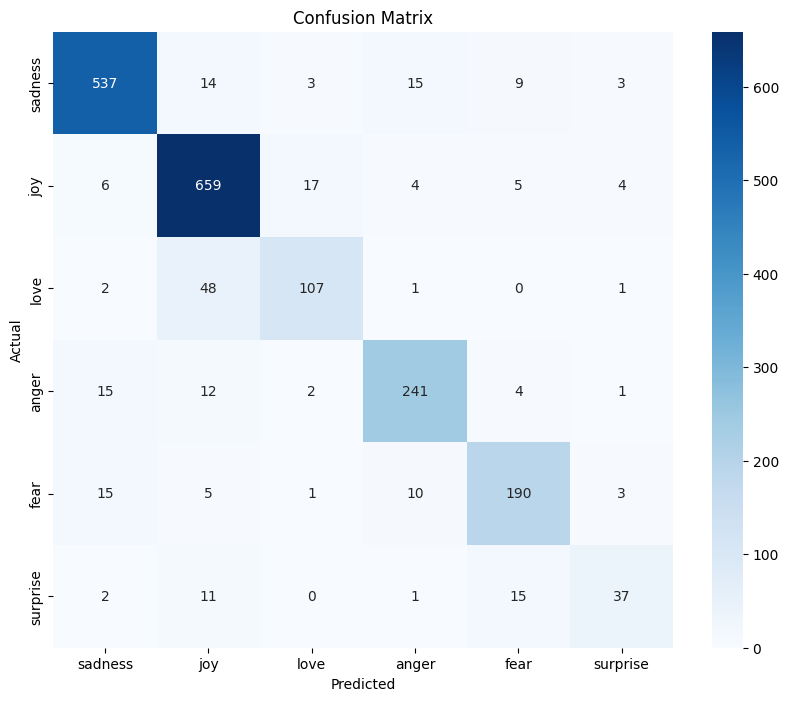

In [41]:
# Printing the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(df_test['label'], y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=ds['train'].features['label'].names, yticklabels=ds['train'].features['label'].names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Task - 3

In [42]:
def concatenate_with_pos_tags(sentences):
    concatenated_sentences = []
    for sentence in sentences:
        pos_tags, probab = viterbi_algorithm(sentence, Unique_Tags, start_probs, transition_matrix)  # Use the Viterbi algorithm to get POS tags
        Tokens_generated = word_tokenize(sentence)
        concatenated_sentence = ' '.join([f"{word}_{tag}" for word, tag in zip(Tokens_generated, pos_tags)])
        concatenated_sentences.append(concatenated_sentence)
    return concatenated_sentences

# Apply Viterbi and concatenate tags with words for training and test data
df_train['text'] = concatenate_with_pos_tags(df_train['text'])
df_test['text'] = concatenate_with_pos_tags(df_test['text'])

In [43]:
# Vectorize the concatenated text
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(df_train['text'])
x_test = vectorizer.transform(df_test['text'])

In [44]:
# Choose a classifier (SVM or Naive Bayes)
classifier = SVC(kernel='linear')  # Or MultinomialNB()
classifier.fit(x_train, df_train['label'])

# Predict the labels for the test set
y_pred = classifier.predict(x_test)

# Evaluate the classifier
print(classification_report(df_test['label'], y_pred))
print("Accuracy:", accuracy_score(df_test['label'], y_pred))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78       581
           1       0.71      0.90      0.79       695
           2       0.77      0.43      0.55       159
           3       0.88      0.56      0.68       275
           4       0.83      0.62      0.71       224
           5       0.81      0.33      0.47        66

    accuracy                           0.74      2000
   macro avg       0.79      0.61      0.66      2000
weighted avg       0.76      0.74      0.73      2000

Accuracy: 0.7445


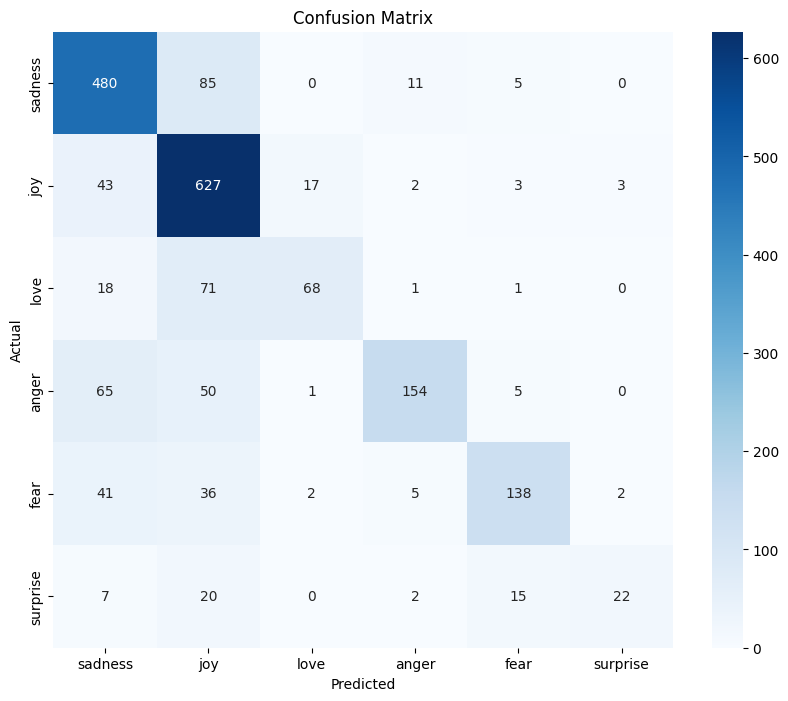

In [45]:
# Printing the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(df_test['label'], y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=ds['train'].features['label'].names, yticklabels=ds['train'].features['label'].names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()